In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('Project_description_and_data/claims_train.csv')

In [2]:
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53
...,...,...,...,...,...,...,...,...,...,...,...,...
542405,2063494.0,0,0.20,D,6,10,32,76,B2,Diesel,1314,R24
542406,4164964.0,0,0.06,D,10,14,34,60,B5,Diesel,685,R72
542407,3078112.0,0,0.34,C,6,8,32,95,B5,Diesel,242,R82
542408,1012927.0,0,0.72,E,9,7,39,72,B2,Regular,3301,R73


In [3]:
df['ClaimNb'].value_counts()

ClaimNb
0     515199
1      25718
2       1416
3         67
4          4
11         2
5          2
6          1
9          1
Name: count, dtype: int64

In [4]:
df['Exposure'].value_counts()

Exposure
1.00    134483
0.08     35548
0.07     10355
0.24     10328
0.50      9944
         ...  
1.53         1
1.74         1
1.55         1
1.93         1
1.62         1
Name: count, Length: 186, dtype: int64

In [5]:
df['VehBrand'].value_counts()

VehBrand
B12    132831
B1     130256
B2     127821
B3      42682
B5      27850
B6      22754
B4      20186
B10     14220
B11     10889
B13      9680
B14      3241
Name: count, dtype: int64

In [6]:
df['VehGas'].value_counts()

VehGas
Regular    276723
Diesel     265687
Name: count, dtype: int64

In [7]:
df['VehPower'].value_counts()

VehPower
6     119230
7     116340
5      99841
4      92413
8      37369
10     25159
9      24080
11     14652
12      6515
13      2582
15      2321
14      1908
Name: count, dtype: int64

In [8]:
df['VehAge'].value_counts()

VehAge
1     57009
2     47321
0     46072
3     40272
4     34753
      ...  
64        1
65        1
82        1
59        1
76        1
Name: count, Length: 76, dtype: int64

In [9]:
df['DrivAge'].value_counts()

DrivAge
36     14026
39     13905
37     13849
38     13841
52     13701
       ...  
95        22
96        11
97         7
98         4
100        2
Name: count, Length: 83, dtype: int64

In [10]:
df['Area'].value_counts()

Area
C    153287
D    121235
E    109911
A     83150
B     60423
F     14404
Name: count, dtype: int64

In [11]:
df['Density'].value_counts()

Density
27000    8450
3317     7920
1313     5632
9307     4794
3744     4433
         ... 
1420        1
1598        1
1126        1
1514        1
1651        1
Name: count, Length: 1606, dtype: int64

In [12]:
df['Region'].value_counts()

Region
R24    128502
R82     67772
R93     63517
R11     55984
R53     33643
R52     30942
R91     28722
R72     24965
R31     21813
R54     15226
R73     13730
R41     10376
R25      8708
R26      8356
R23      7036
R22      6397
R83      4242
R74      3672
R94      3593
R21      2402
R42      1752
R43      1060
Name: count, dtype: int64

In [13]:
df['BonusMalus'].value_counts()

BonusMalus
50     307394
100     15631
68      14996
72      14851
76      14632
        ...  
163         1
151         1
177         1
228         1
218         1
Name: count, Length: 115, dtype: int64

In [14]:
print(len(df[df['BonusMalus']<100]), len(df[df['BonusMalus']>=100])) #len(df[df['BonusMalus']==100]))

520541 21869


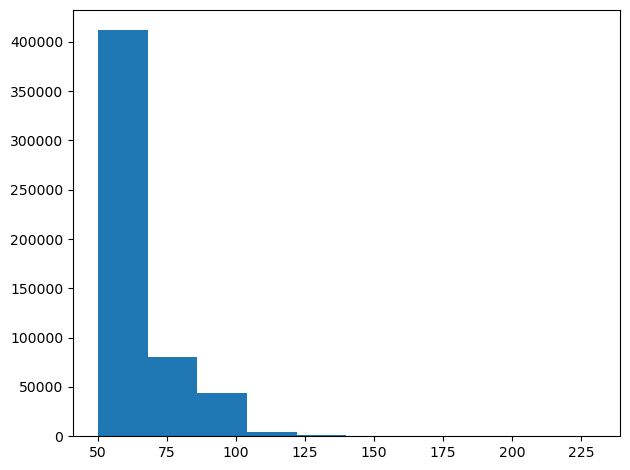

In [15]:
x= df['BonusMalus'].values
plt.hist(x, bins=10)
plt.tight_layout()

In [16]:
df['Density'].max()

27000

In [17]:
def claim_per_month(df, ClaimNB, Exposure, ClaimPerMonth):
    df[ClaimPerMonth]= df[ClaimNB] / (df[Exposure]*12)
    return df

df= claim_per_month(df, 'ClaimNb', 'Exposure', 'ClaimPerMonth')

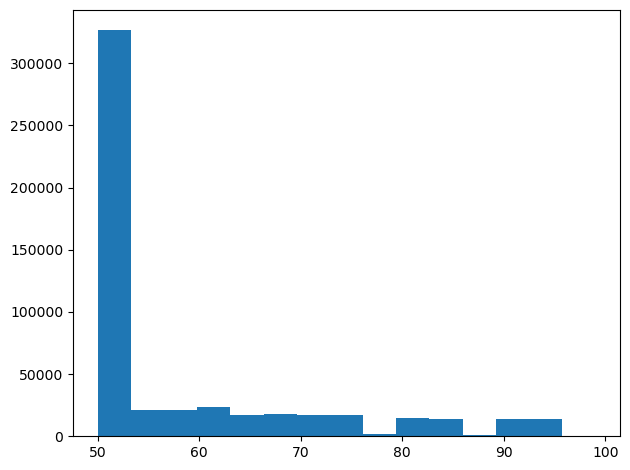

In [18]:
good = df[df['BonusMalus']<100]
bad = df[df['BonusMalus']>=100]
plt.hist(good['BonusMalus'].values, bins=15)
plt.tight_layout()



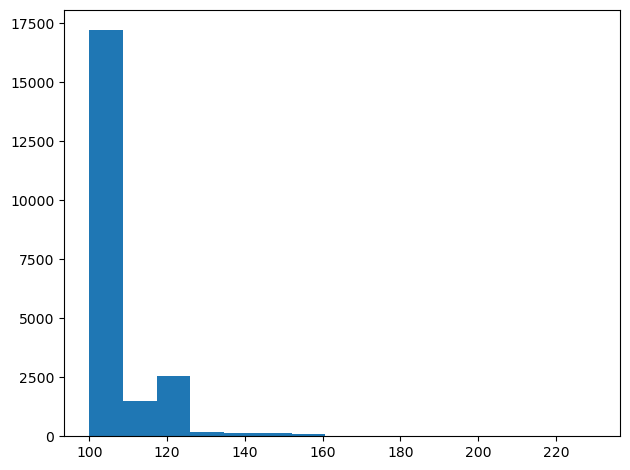

In [19]:
plt.hist(bad['BonusMalus'].values, bins=15)
plt.tight_layout()

In [20]:
score_50 = df[(df['BonusMalus']==50) & (df['ClaimNb']==11)]
score_50

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimPerMonth
187281,3254353.0,11,0.07,D,4,13,53,50,B1,Regular,824,R91,13.095238
328061,19471.0,11,1.00,A,5,6,65,50,B2,Diesel,13,R24,0.916667


In [21]:
df['ClaimPerMonth'].max()

61.000000000001556

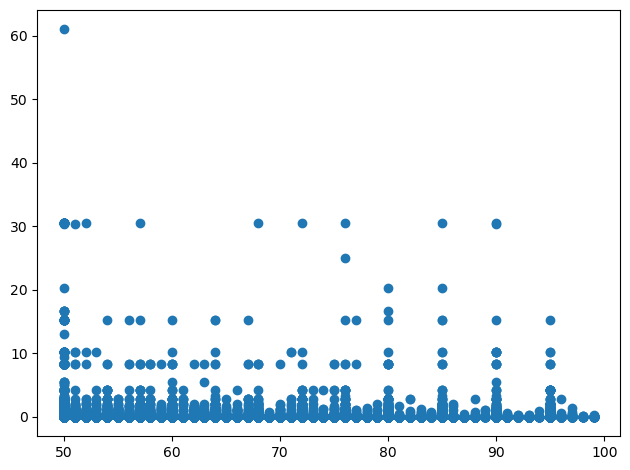

In [22]:
x = good['BonusMalus'].values
y = good['ClaimPerMonth'].values

plt.scatter(x, y)
plt.tight_layout()

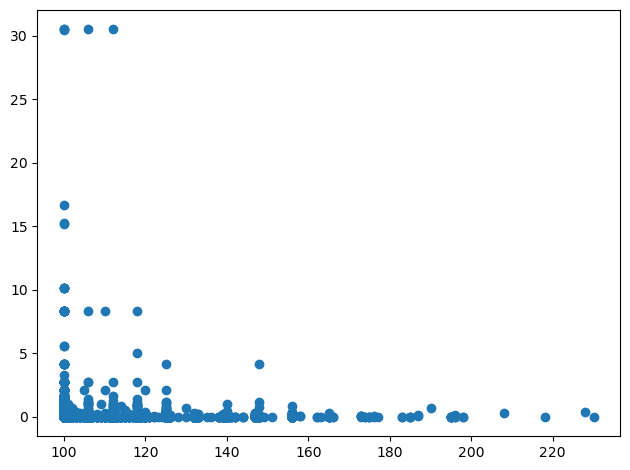

In [23]:
x = bad['BonusMalus'].values
y = bad['ClaimPerMonth'].values

plt.scatter(x, y)
plt.tight_layout()

In [24]:
import numpy as np

df['VehGas']=np.where((df['VehGas']=='Regular'), 0, 1)
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimPerMonth
0,2122523.0,0,0.43,D,7,18,36,95,B1,0,1054,R24,0.0
1,3173420.0,0,0.10,D,7,17,80,95,B2,0,598,R25,0.0
2,1188619.0,0,0.33,E,7,3,36,76,B6,0,4172,R82,0.0
3,31400.0,0,0.56,A,5,4,73,52,B13,1,15,R24,0.0
4,3138755.0,0,0.27,E,8,0,37,50,B11,1,3021,R53,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,2063494.0,0,0.20,D,6,10,32,76,B2,1,1314,R24,0.0
542406,4164964.0,0,0.06,D,10,14,34,60,B5,1,685,R72,0.0
542407,3078112.0,0,0.34,C,6,8,32,95,B5,1,242,R82,0.0
542408,1012927.0,0,0.72,E,9,7,39,72,B2,0,3301,R73,0.0


In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['VehBrand', 'VehGas', 'Area', 'Region']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
df.corr()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimPerMonth
IDpol,1.000000,-0.128408,-0.160993,0.070293,0.048501,-0.157938,0.062771,-0.004930,-0.079253,0.045617,0.071260,0.025180,-0.055068
ClaimNb,-0.128408,1.000000,0.069290,0.013323,-0.004672,-0.022305,0.011354,0.049738,0.001577,-0.013188,0.011443,-0.008583,0.263534
Exposure,-0.160993,0.069290,1.000000,-0.121742,-0.046111,0.151645,0.171762,-0.182715,0.029464,-0.040053,-0.071148,-0.073799,-0.052672
Area,0.070293,0.013323,-0.121742,1.000000,0.004536,-0.104431,-0.045817,0.121867,-0.001063,-0.128621,0.589498,0.042459,0.006895
VehPower,0.048501,-0.004672,-0.046111,0.004536,1.000000,-0.005627,0.029498,-0.075220,-0.103430,0.058656,0.043862,0.010115,-0.001430
VehAge,-0.157938,-0.022305,0.151645,-0.104431,-0.005627,1.000000,-0.059785,0.079740,0.030723,-0.127265,-0.090440,-0.051107,-0.023962
DrivAge,0.062771,0.011354,0.171762,-0.045817,0.029498,-0.059785,1.000000,-0.479640,-0.054026,-0.070896,-0.004418,0.026071,-0.003344
BonusMalus,-0.004930,0.049738,-0.182715,0.121867,-0.075220,0.079740,-0.479640,1.000000,0.040150,-0.031900,0.078604,-0.028382,0.013873
VehBrand,-0.079253,0.001577,0.029464,-0.001063,-0.103430,0.030723,-0.054026,0.040150,1.000000,0.010127,-0.022302,0.015143,-0.004284
VehGas,0.045617,-0.013188,-0.040053,-0.128621,0.058656,-0.127265,-0.070896,-0.031900,0.010127,1.000000,-0.099131,-0.001116,-0.011069


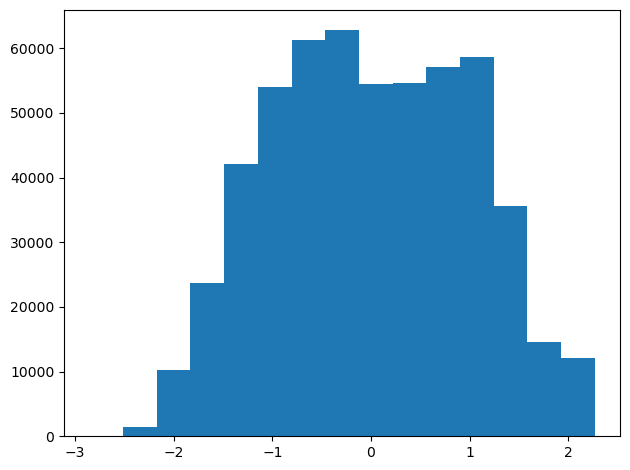

In [27]:
df['Density'] = np.log(df['Density']+1)
scaler = StandardScaler()
df['Density'] = scaler.fit_transform(df[['Density']])
plt.hist(df['Density'].values, bins=15)
plt.tight_layout()

In [28]:
df['VehPower'] = scaler.fit_transform(df[['VehPower']])

https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Age_of_vehicle

In [29]:
bin_edges = [0, 2, 6, 10, 15, 100]
df['VehAge'] = pd.cut(df['VehAge'], bins=bin_edges, labels=[1, 2, 3, 4, 5], include_lowest=True)

#1: Less than 2 years
#2: Between 2 and 5 years (2 years, 3 years, 4 years, 5 years)
#3: Between 6 and 9 years (6 years, 7 years, 8 years, 9 years)
#4: From 10 to 14 years
#5: 15 years or over

In [30]:
df['DrivAge']=pd.cut(
    df['DrivAge'],
    bins=[17, 25, 35, 50, 65, 100],
    labels= [1, 2, 3, 4, 5],            # 1: 18-25, 2: 26-35, 3: 36-50, 4: 51-65, 5: 65+
    right= True
)

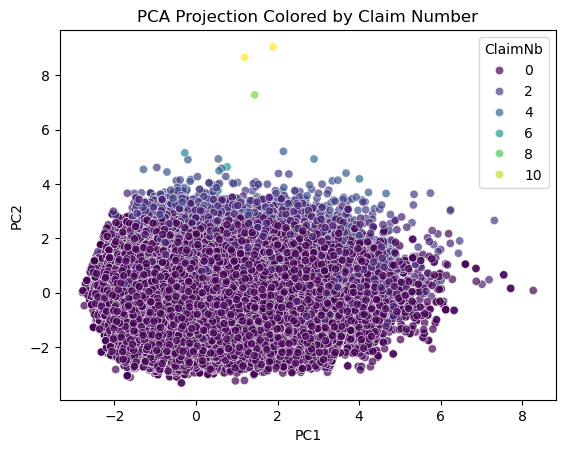

PC1: 25.96%, PC2: 18.55%, Total: 44.51%
                 PC1       PC2
ClaimNb     0.053836  0.211034
DrivAge    -0.666567  0.053018
BonusMalus  0.690284  0.040555
VehPower   -0.146081  0.117594
VehAge      0.156279 -0.682954
Density     0.174743  0.686115


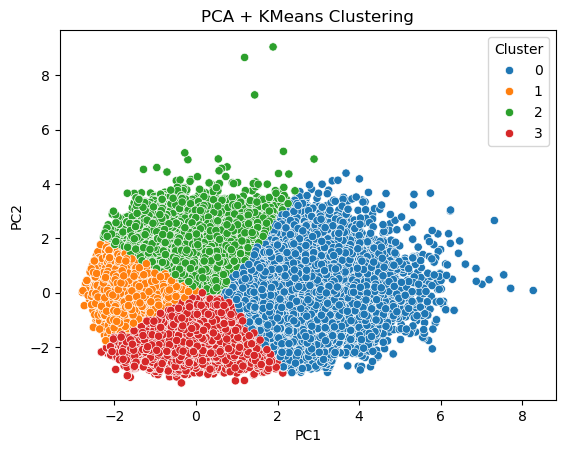

In [31]:
features = ["ClaimNb", "DrivAge", "BonusMalus", "VehPower", "VehAge", "Density"]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans


X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]


sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="ClaimNb",
    data=df,
    palette="viridis",
    alpha=0.7
)
plt.title("PCA Projection Colored by Claim Number")
plt.show()

explained = pca.explained_variance_ratio_
print(f"PC1: {explained[0]:.2%}, PC2: {explained[1]:.2%}, Total: {explained[:2].sum():.2%}")

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
)
print(loadings)


kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_pca)

sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df, palette="tab10")
plt.title("PCA + KMeans Clustering")
plt.show()
